# **HYUNDAI STOCK PRICE PREDICTION USING MACHINE LEARNING**



This project involves predicting Hyundai stocks prices using variuos machine learning models: **Linear Regresssion**, **Random Forest Regressor**, **Gradient Descent Regressor**, **Ridge Regressor**, **Lasso Regressor**, **ElasticNet Regressor**.

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Libraries

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Making DataFrame

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ML_proj/dataset_stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,110097.875000,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,109715.578125,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,107039.593750,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,105128.164062,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,104363.609375,888701


Columns and Shape of Dataframe

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(2118, 7)

Some Statistics

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2.118000e+03
mean,166098.111426,168294.948064,163998.064212,166100.849858,144287.653161,8.584012e+05
std,41902.890256,42551.646665,41281.009541,41821.206244,45200.465900,9.460787e+05
min,67200.000000,71000.000000,65000.000000,65900.000000,56764.769531,0.000000e+00
25%,134000.000000,135500.000000,132500.000000,134000.000000,106660.078125,4.250140e+05
50%,158000.000000,160500.000000,156000.000000,158500.000000,127016.882812,5.971490e+05
75%,191475.000000,193500.000000,189575.000000,191975.000000,177094.343750,9.337368e+05
max,299500.000000,299500.000000,293000.000000,298000.000000,298000.000000,1.993370e+07


Box Plot

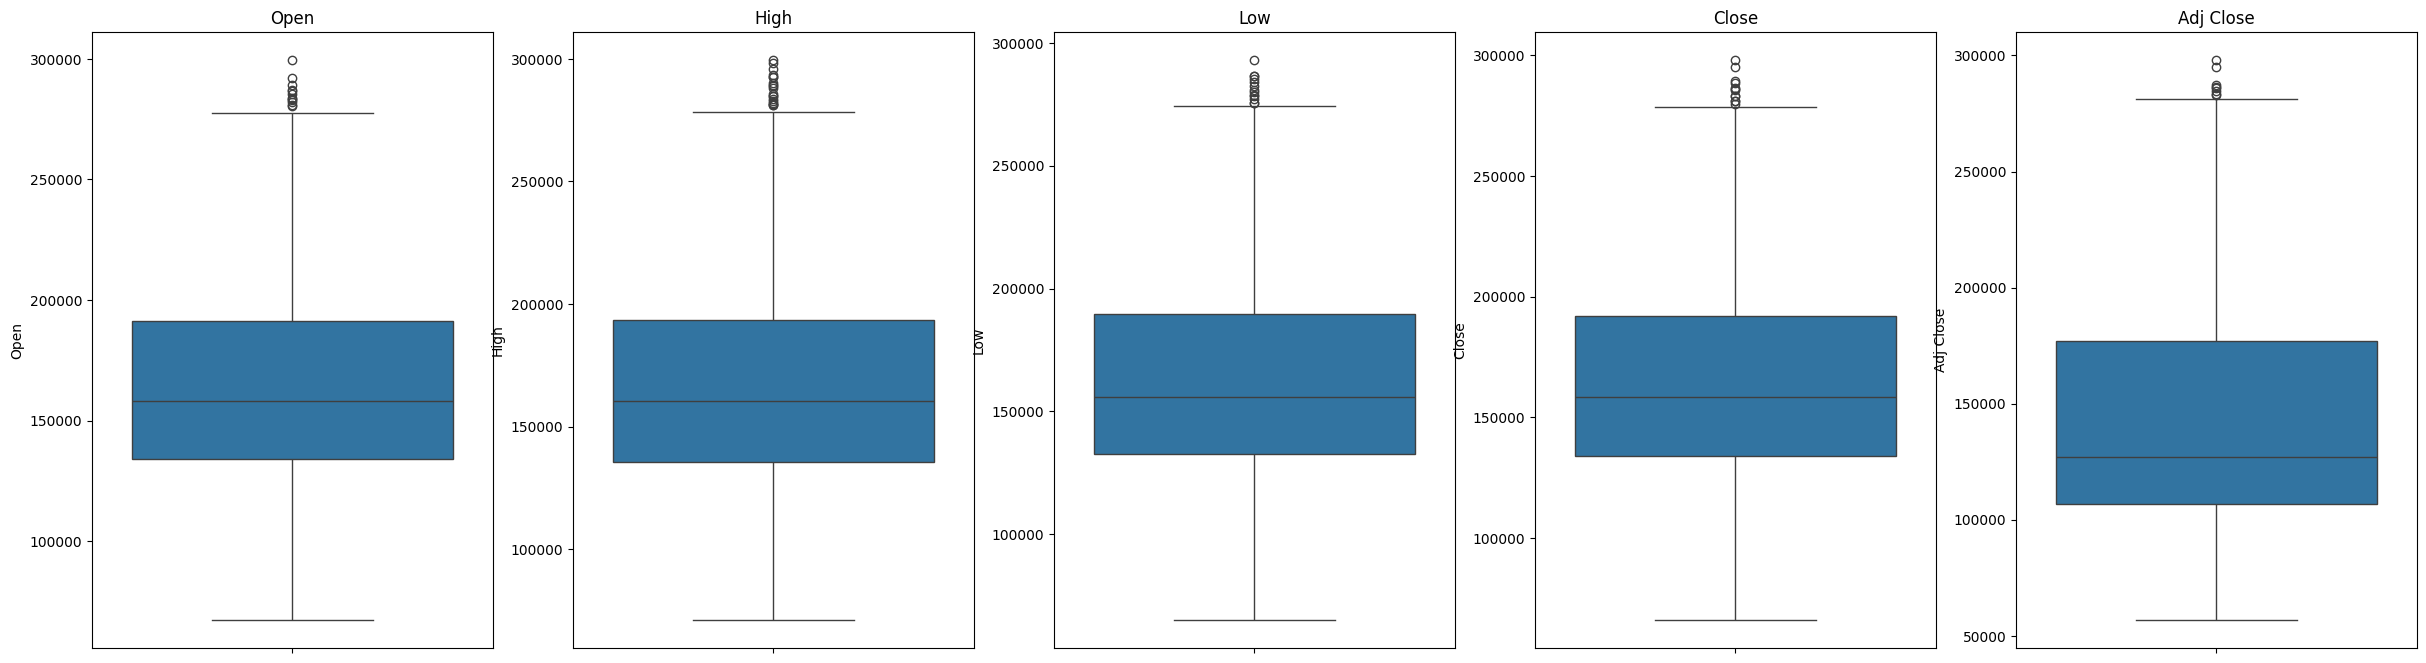

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(30, 8))
for axid, col in enumerate(["Open", "High", "Low", "Close", "Adj Close"]):
    sns.boxplot(y=df[col], ax=ax[axid])
    ax[axid].set_title(col)


Scatter Plot

<Axes: xlabel='Volume', ylabel='Close'>

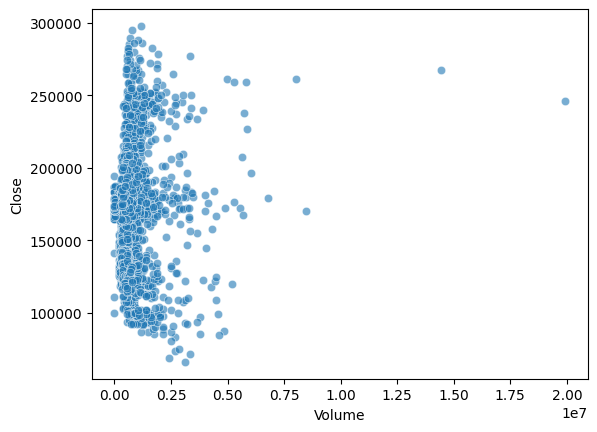

In [ ]:
sns.scatterplot(x=df["Volume"], y=df["Close"], alpha = 0.6)

<Axes: xlabel='Low', ylabel='High'>

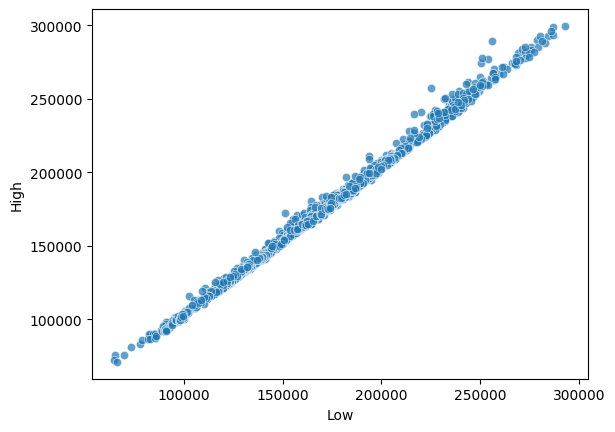

In [ ]:
sns.scatterplot(x=df["Low"], y=df["High"], alpha=0.7)

<Axes: xlabel='Open', ylabel='Close'>

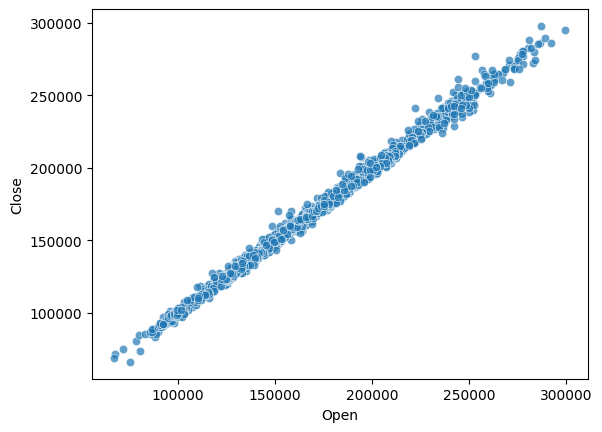

In [ ]:
sns.scatterplot(x=df["Open"], y=df["Close"], alpha=0.7)

<Axes: xlabel='Date', ylabel='Adj Close'>

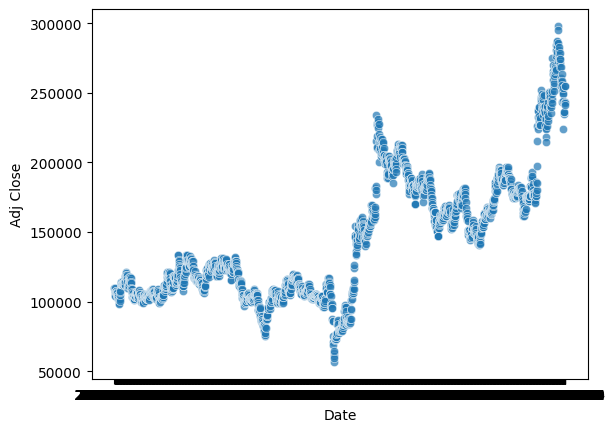

In [ ]:
sns.scatterplot(x=df["Date"], y=df["Adj Close"], alpha=0.7)

**Null Values in the dataset?**

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
from sklearn import preprocessing

In [ ]:
df.drop(columns=['Adj Close'], inplace=True)

In [ ]:
df.shape

(2118, 6)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,888701


<Axes: >

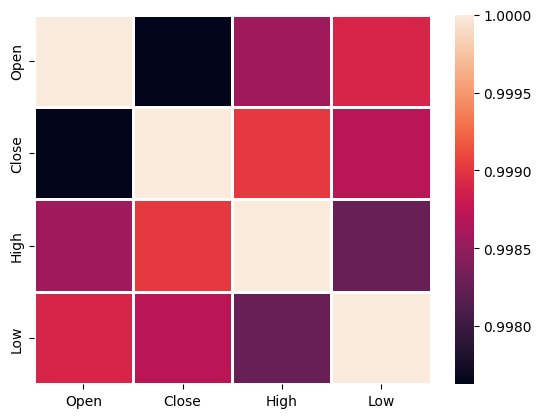

In [ ]:
new_df = df[["Open", "Close", "High", "Low"]]
sns.heatmap(data=new_df.corr(), lw = 1)

In [ ]:
# Representation of Stock Market Data in Candlestick pattern.
import plotly.graph_objects as pgo
figure = pgo.Figure(data=[pgo.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
figure.update_layout(title='Stock Price Predictor', xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
# Separating attribute and prediction value.
X= df[['Open','High','Low','Volume']].values
Y= df['Close'].values

In [ ]:
# Creating training, validation and testing set.
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size=0.2, random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

In [ ]:
print('Train:', X_train.shape)
print('Val:', X_val.shape)
print('Test:', X_test.shape)

Train: (1694, 4)
Val: (212, 4)
Test: (212, 4)


In [ ]:
# Combining Training and Validation set.
X_combined = np.concatenate((X_train, X_val), axis=0)
Y_combined = np.concatenate((Y_train, Y_val), axis=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.transform(X_val)
X_test_scaler = scaler.transform(X_test)
X_combined_scaler = scaler.fit_transform(X_combined)

In [ ]:
print('Train:', X_combined_scaler.shape)

Train: (1906, 4)


# **MODEL FOR LINEAR REGRESSION**

**PSEUDOCODE:**
1. Importing LinearRegression Model from sklearn and fitting it on training data.
2. Predicting the stock price for the validation set.
3. Checking metrics and performance for the model on the validation set.

In [ ]:
#Importing Linear Regression Model from Sklearn.
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
model=lr.fit(X_train_scaler, Y_train)
Y_pred_lr= lr.predict(X_val_scaler)

In [ ]:
Y_pred_lr.shape

(212,)

In [ ]:
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
from pandas.plotting import register_matplotlib_converters

model = LinearRegression()
model.fit(X_train_scaler, Y_train)
y_pred_lr = model.predict(X_test_scaler)
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = math.sqrt(mse_lr)
print("Maximum Error:", max_error(Y_val, y_pred_lr))
print("Root mean Square Error:", rmse_lr)
print("Mean Absolute Error:", mae_lr)

Maximum Error: 163322.28934835625
Root mean Square Error: 1240.6091226310923
Mean Absolute Error: 881.1211962576265


In [ ]:
reg_coeff = pd.DataFrame()
reg_coeff["Columns"] = new_df.columns
reg_coeff['Coefficient Estimate'] = pd.Series(model.coef_)
reg_coeff

,Columns,Coefficient Estimate
0,Open,-20893.906203
1,Close,34201.303429
2,High,28637.560499
3,Low,-128.401006


In [ ]:
x1=abs(Y_pred_lr-Y_val)
y1=100*(x1/Y_val)
accuracy_lr= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy_lr,2),'%.')

MAE based Accuracy 99.42 %.


In [ ]:
df1=pd.DataFrame({'Actual Price':Y_val,'Predicted Price':Y_pred_lr})
df1.describe()

,Actual Price,Predicted Price
count,212.000000,212.000000
mean,167262.735849,167235.765298
std,41295.921767,41220.280760
min,87200.000000,86892.332071
25%,135875.000000,136715.592866
50%,161500.000000,160424.105390
75%,194625.000000,194354.283489
max,265500.000000,266136.737523


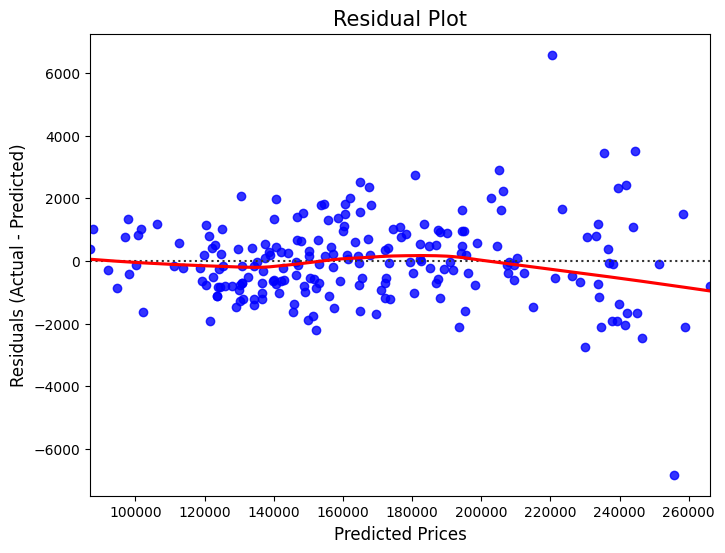

In [ ]:
# Plotting residuals
residuals = Y_val - Y_pred_lr

plt.figure(figsize=(8, 6))
sns.residplot(x=Y_pred_lr, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot', fontsize=15)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()


# **MODEL FOR RANDOM FOREST REGRESSION**

**PSEUDOCODE:**
1. Importing RandomForestRegression Model from sklearn and fitting it on training data.
2. Predicting the stock price for the validation set.
3. Checking metrics and performance for the model on the validation set.

In [ ]:
#Importing Random Forest Regression Model from Sklearn.
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model2= rfr.fit(X_train_scaler, Y_train)
Y_pred_rf= rfr.predict(X_val_scaler)

In [ ]:
Y_pred_rf.shape

(212,)

In [ ]:
df2=pd.DataFrame({'Actual Price':Y_val,'Predicted Price':Y_pred_rf})
print(df2)

     Actual Price  Predicted Price
0        122500.0         123000.0
1        186200.0         186331.0
2        179300.0         177426.0
3         87200.0          84492.0
4        161500.0         161045.0
..            ...              ...
207      146000.0         146200.0
208      133000.0         135210.0
209      147000.0         148070.0
210      233000.0         234055.0
211      138000.0         137545.0

[212 rows x 2 columns]


In [ ]:
from pandas.plotting import register_matplotlib_converters
mae_rf= mean_absolute_error(Y_val,Y_pred_rf)
mse_rf= mean_squared_error(Y_val,Y_pred_rf)
rmse_rf= math.sqrt(mse_rf)
print("Maximum Error:", max_error(Y_val, Y_pred_rf))
print("Root mean Square Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)

Maximum Error: 7790.0
Root mean Square Error: 1482.6023350724442
Mean Absolute Error: 1048.6650943396226


In [ ]:
x1=abs(Y_pred_rf-Y_val)
y1=100*(x1/Y_val)
accuracy_rf= 100-np.mean(y1)
print('MAE based Accuracy', round(accuracy_rf,2),'%.')

MAE based Accuracy 99.37 %.


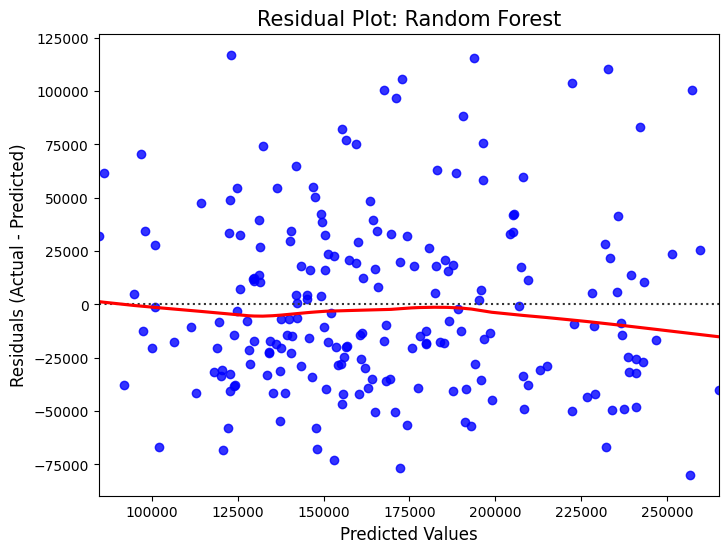

In [ ]:
# Residual Plot for Random Forest
residuals_rf = Y_test - Y_pred_rf
plt.figure(figsize=(8, 6))
sns.residplot(x=Y_pred_rf, y=residuals_rf, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot: Random Forest', fontsize=15)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()

# **STOCHASTIC GRADIENT DESCENT**

**PSEUDOCODE:**
1. Importing Stochastic Gradient Descent Regresssor Model from sklearn and fitting it on training data.
2. Predicting the stock price for the validation set.
3. Checking metrics and performance for the model on the validation set.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize and train the Gradient Descent Regressor
gd = SGDRegressor(max_iter=200000, learning_rate='adaptive', eta0=0.01, random_state=42)
gd.fit(X_train_scaler, Y_train)

# Predict and evaluate
y_pred_gd = gd.predict(X_test_scaler)
mae_gd = mean_absolute_error(Y_test, y_pred_gd)
mse_gd = mean_squared_error(Y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)  # RMSE is the square root of MSE
print("Maximum Error:", max_error(Y_val, y_pred_gd))
print("Root mean Square Error:", rmse_gd)
print("Mean Absolute Error:", mae_gd)

Maximum Error: 162690.129160006
Root mean Square Error: 1271.8124281843734
Mean Absolute Error: 923.7100403279297


In [ ]:
# Gradient Descent Accuracy
x1_gd = abs(y_pred_gd - Y_test)
y1_gd = 100 * (x1_gd / Y_test)
accuracy_gd = 100 - np.mean(y1_gd)
print('MAE based Accuracy', round(accuracy_gd,2),'%.')

MAE based Accuracy 99.43 %.


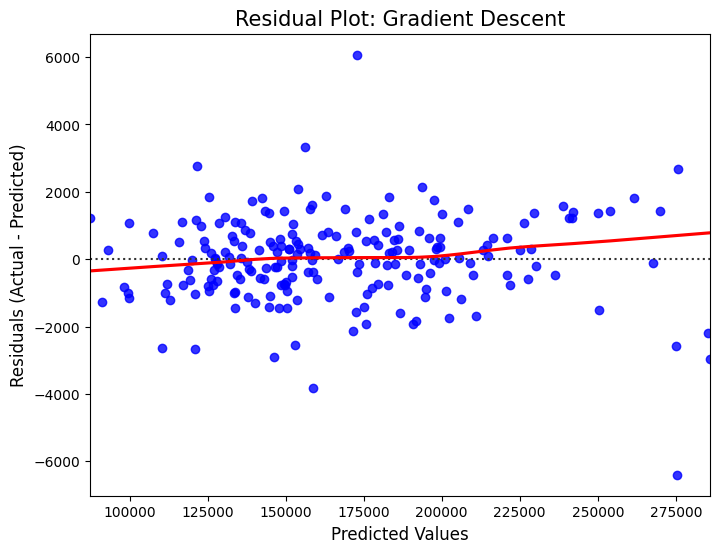

In [ ]:
# Residual Plot for Gradient Descent
residuals_gd = Y_test - y_pred_gd
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_gd, y=residuals_gd, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot: Gradient Descent', fontsize=15)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()

# **PIPELINE BASED MODEL**

**PSEUDOCODE:**
1. Importing Pipeline Based Models - Ridge, Lasso and ElasticNet from sklearn and fitting it on training data.
2. Predicting the stock price for the validation set.
3. Checking metrics and performance for the model on the validation set.

In [ ]:
#Importing Pipeline module and Ridge, Lasso and ElasticNet Regression.
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.exceptions import NotFittedError

In [ ]:
pipelines = {
    'lr':make_pipeline(LinearRegression()),
    'rfr':make_pipeline(RandomForestRegressor()),
    'gd':make_pipeline(SGDRegressor()),
    'ridge':make_pipeline(Ridge()),
    'lasso':make_pipeline(Lasso()),
    'elasticnet':make_pipeline(ElasticNet())
}

In [ ]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
param_grid = {
    'lr':{
        'linearregression__copy_X': [True,False],
        'linearregression__fit_intercept': [True,False],
        'linearregression__positive' : [True,False]
    },
    'rfr':{
        'randomforestregressor__n_estimators': [100, 200, 300],
        'randomforestregressor__min_samples_leaf': [1, 5, 10],
        'randomforestregressor__max_depth': [None, 10, 20],
        'randomforestregressor__max_features': ['log2', 'sqrt'],
        'randomforestregressor__bootstrap': [True, False]
    },
    'gd':{
        'sgdregressor__loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'sgdregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'ridge__fit_intercept':[True, False],
        'ridge__copy_X':[True, False],
        'ridge__positive':[True, False],
        'ridge__max_iter':[1000, 2000, 3000, 4000, 5000],
        'ridge__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'lasso__fit_intercept':[True, False],
        'lasso__copy_X':[True, False],
        'lasso__positive':[True, False],
        'lasso__max_iter':[1000, 2000, 3000, 4000, 5000],
        'lasso__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
    },
    'elasticnet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'elasticnet__fit_intercept':[True, False],
        'elasticnet__copy_X':[True, False],
        'elasticnet__positive':[True, False],
        'elasticnet__max_iter':[1000, 2000, 3000, 4000, 5000],
        'elasticnet__tol':[1e+8, 2e+8, 3e+8, 4e+8, 5e+8],
        'elasticnet__l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
#Fitting model added in the pipeline on Training Set.
fit_models = {}

for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, param_grid[algo], cv=5, n_jobs=-1, error_score='raise')
    try:
        print(f'Starting training for {algo}.')
        model.fit(X_train_scaler, Y_train)
        fit_models[algo] = model
        print(f'{algo} has been successfully fit.')
    except NotFittedError as e:
        print(repr(e))

Starting training for lr.
lr has been successfully fit.
Starting training for rfr.
rfr has been successfully fit.
Starting training for gd.
gd has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for elasticnet.
elasticnet has been successfully fit.


In [ ]:
#Checking Metrics on Test Set.
for algo,model in fit_models.items():
    ypred = model.predict(X_test_scaler)
    print(f'{algo} scores - MAE:{mean_absolute_error(Y_test,ypred)} MSE:{mean_squared_error(Y_test,ypred)} RMSE:{math.sqrt(mean_squared_error(Y_test,ypred))} Max Error:{max_error(Y_test,ypred)}')

lr scores - MAE:881.1211962576265 MSE:1539110.9951554886 RMSE:1240.6091226310923 Max Error:6743.860058701597
rfr scores - MAE:1105.9039326532713 MSE:2355504.222717383 RMSE:1534.7652011683685 Max Error:6368.476370851364
gd scores - MAE:1179.8401087354018 MSE:2660464.246145568 RMSE:1631.0929606081831 Max Error:5943.4446172131575
ridge scores - MAE:885.5584986359714 MSE:1540253.6646522281 RMSE:1241.0695647916873 Max Error:6696.484679605404
lasso scores - MAE:2099.8201352572432 MSE:8227915.304175897 RMSE:2868.4342949030392 Max Error:11521.043799808947
elasticnet scores - MAE:1889.3190855924738 MSE:6573682.557900157 RMSE:2563.919374297904 Max Error:10177.673507051484


# **CONCLUSION**


Based on the evaluation metrics, **Linear Regression** emerges as the best model for predicting Hyundai stock prices, offering the lowest MAE (881.12) and RMSE (1240.61), which indicates high accuracy and minimal error in predictions.

Ridge Regression is a close second, with comparable performance metrics (MAE: 885.56, RMSE: 1241.07) and slightly better handling of extreme errors (Max Error: 6696.48 compared to Linear Regression's 6743.86). These two models are suitable for this task.

Random Forest Regressor and Gradient Descent Regressor showed moderate performance, with higher MAE and RMSE values. They may benefit from further hyperparameter tuning to improve their accuracy.

Lasso Regression and ElasticNet Regression performed poorly, with significantly higher error metrics (MAE: 2099.82 and 1889.32, respectively) and extreme Max Errors. These models are not recommended for this dataset.

Thus, Linear Regression is the optimal choice, with Ridge Regression as a strong alternative.